In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler


In [35]:
df = pd.read_pickle('./data/5s/labeled/features_r02/all_data.pkl')
df.shape

(6819, 10790)

In [8]:
NUM_LABEL_COLS = 13

In [22]:
just_alto = df
just_alto = just_alto[just_alto['alto'] == '1']
just_alto = just_alto[just_alto['sop'] != '1'] 
just_alto = just_alto[just_alto['tenr'] != '1']
just_alto = just_alto[just_alto['bari'] != '1']
just_alto = just_alto[just_alto['clrt'] != '1']
just_alto = just_alto[just_alto['tora'] != '1']
just_alto = just_alto[just_alto['othr'] != '1']
just_alto = just_alto[just_alto['trmp'] != '1']
just_alto = just_alto[just_alto['trmb'] != '1']
just_alto = just_alto[just_alto['otrb'] != '1']
print(just_alto.shape[0])

688


In [23]:
just_tenor = df
just_tenor = just_tenor[just_tenor['tenr'] == '1']
just_tenor = just_tenor[just_tenor['sop'] != '1']
just_tenor = just_tenor[just_tenor['alto'] != '1'] 
just_tenor = just_tenor[just_tenor['bari'] != '1']
just_tenor = just_tenor[just_tenor['clrt'] != '1']
just_tenor = just_tenor[just_tenor['tora'] != '1']
just_tenor = just_tenor[just_tenor['othr'] != '1']
just_tenor = just_tenor[just_tenor['trmp'] != '1']
just_tenor = just_tenor[just_tenor['trmb'] != '1']
just_tenor = just_tenor[just_tenor['otrb'] != '1']
print(just_tenor.shape[0])

2480


In [56]:
just_soprano = df
just_soprano = just_soprano[just_soprano['sop'] == '1']
just_soprano = just_soprano[just_soprano['alto'] != '1'] 
just_soprano = just_soprano[just_soprano['tenr'] != '1']
just_soprano = just_soprano[just_soprano['bari'] != '1']
just_soprano = just_soprano[just_soprano['clrt'] != '1']
just_soprano = just_soprano[just_soprano['tora'] != '1']
just_soprano = just_soprano[just_soprano['othr'] != '1']
just_soprano = just_soprano[just_soprano['trmp'] != '1']
just_soprano = just_soprano[just_soprano['trmb'] != '1']
just_soprano = just_soprano[just_soprano['otrb'] != '1']
print(just_soprano.shape[0])

145


In [57]:
frames = [just_tenor, just_alto, just_soprano]
combined = pd.concat(frames)

In [58]:
num_x_cols = combined.shape[1] - NUM_LABEL_COLS - 1 

In [59]:
combined['class'] = combined['alto'].astype(int) + 2 * combined['tenr'].astype(int)
# combined['class'] = combined['class'].astype(int)
target = combined['class'].to_numpy().ravel()  
target.shape

(3313,)

In [60]:
# ^ last bit to adjust for zero indexing
data = combined.iloc[:, 1:num_x_cols].to_numpy() 
# ^ These are the features
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [61]:
pca = PCA(n_components=2)
pca.fit(data)
d = pca.transform(data)

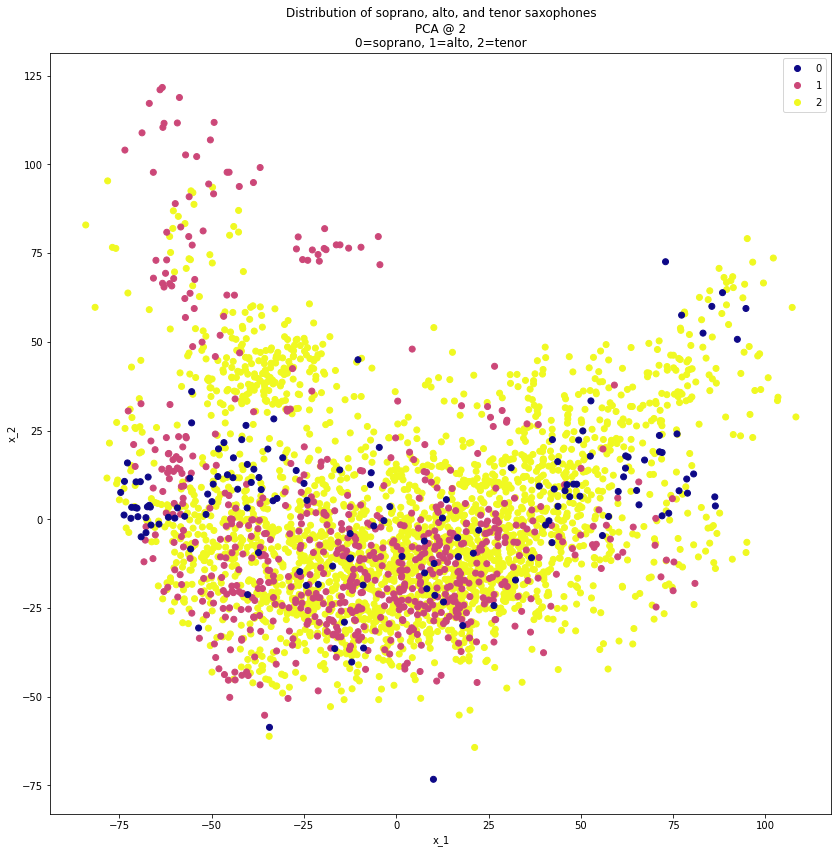

In [75]:
fig = plt.figure(figsize=(14, 14))
s = plt.scatter(d[:, 0], d[:, 1], c=target)
s.set_cmap('plasma')
plt.legend(*s.legend_elements())
plt.title('Distribution of soprano, alto, and tenor saxophones\nPCA @ 2\n0=soprano, 1=alto, 2=tenor')
plt.xlabel('x_1')
plt.ylabel('x_2')
fig.savefig('sax_dist.jpg')